<a href="https://colab.research.google.com/github/gsuvo/Modeling_multi-class_classification_defunciones-transtornos_y_censo-poblacional/blob/main/Modeling_multi_class_classification_oversampling_train_Data_y_oversampling_strategy_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook

## Notebook requeriments


In [ ]:
!pwdf

/bin/bash: line 1: pwdf: command not found


In [ ]:
project_path = "/content/drive/MyDrive/delfin 2023"
notebook_path = "/content/drive/MyDrive/delfin 2023/NOTEBOOKS"
model_path = "/content/drive/MyDrive/delfin 2023/MODELS"
data_path = "/content/drive/MyDrive/delfin 2023/DATA"
settings_path = "/content/drive/MyDrive/delfin 2023/SETTINGS"
results_path = "/content/drive/MyDrive/delfin 2023/RESULTS/"

In [ ]:
import os

def authenticate_kaggle(key_path):
    # Mount your Google Drive to Colab
    from google.colab import drive
    drive.mount('/content/drive')

    # Copy the Kaggle API key from your Drive to the .kaggle directory in your Drive
    !mkdir -p /root/.kaggle
    !cp '{key_path}/kaggle.json' /root/.kaggle/

    # Set the permissions for the Kaggle API key
    !chmod 600 /root/.kaggle/kaggle.json

    # Authenticate with the Kaggle API
    os.environ['KAGGLE_CONFIG_DIR'] = "/root/.kaggle"

    if os.environ.get('KAGGLE_CONFIG_DIR') == "/root/.kaggle":
        print('Authenticated with Kaggle API')


In [ ]:
authenticate_kaggle(settings_path)

Mounted at /content/drive
Authenticated with Kaggle API


In [ ]:
import os
import re

def download_dataset(command_string):
    # Extract dataset name from command string
    match = re.search(r'-d\s+([\w/\-]+)', command_string)
    if not match:
        print('Invalid command string. Please specify dataset name in the format "kaggle datasets download -d <dataset_name>".')
        return
    dataset_name = match.group(1)

    # # Authenticate with the Kaggle API
    # authenticate_kaggle(key_path)

    # Download the dataset using the Kaggle API
    !kaggle datasets download -d {dataset_name}

    # Define the name of the zip file
    zip_file = dataset_name.split("/")[-1] #+ ".zip"

    # Remove existing directory with the same name as the dataset
    if os.path.exists(dataset_name.split("/")[-1]):
        !rm -r {dataset_name.split("/")[-1]}

    # Unzip the file
    !unzip -q {zip_file} -d {dataset_name.split("/")[-1]}

    # Check if the dataset folder exists
    if os.path.exists(dataset_name.split("/")[-1]):
        print("Dataset downloaded and extracted successfully!")
    else:
        print("Error: Dataset not downloaded or extracted successfully.")

In [ ]:
%cd '{data_path}'

/content/drive/MyDrive/delfin 2023/DATA


In [ ]:
command_string = "kaggle datasets download -d gustavoacorrea/inegi-nutri"
download_dataset(command_string)

inegi-nutri.zip: Skipping, found more recently modified local copy (use --force to force download)
Dataset downloaded and extracted successfully!


In [ ]:
%ls

inegi-nutri/  inegi-nutri.zip  logs.log


In [ ]:
# DEFUN 2021
#!head '/content/drive/MyDrive/delfin 2023/DATA/inegi-nutri/conjunto_de_datos_defunciones_registradas_2021.csv'

In [ ]:
# DEFUN 2019
#!head '/content/inegi-nutri/Defunciones_2019.CSV'

In [ ]:
# DEFUN 2020
#!head '/content/drive/MyDrive/delfin 2023/DATA/inegi-nutri/conjunto_de_datos_defunciones_registrados_2020.csv'

In [ ]:
# INEGI 2020
#!head '/content/drive/MyDrive/delfin 2023/DATA/inegi-nutri/conjunto_de_datos_iter_00CSV20.csv'

In [ ]:
%cd '{project_path}'

/content/drive/MyDrive/delfin 2023


## Install Libraries

In [ ]:
!pip install dataprep pycaret watermark --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 kB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 69.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.0/764.0 kB 50.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 75.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 19.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.5 MB/s eta 0:00:

## Load libraries

In [ ]:
# Wrangling
import pandas as pd
import numpy as np
from dataprep.eda import create_report

# Watermark
%reload_ext watermark
%watermark -a "Gustavo Aguilar" -p numpy,pandas,dataprep,sklearn,pycaret,matplotlib,plotly

Author: Gustavo Aguilar

numpy     : 1.22.4
pandas    : 1.5.3
dataprep  : 0.4.5
sklearn   : 1.2.2
pycaret   : 3.0.4
matplotlib: 3.7.1
plotly    : 5.13.1



## Load data

In [ ]:
# url01 = '/content/delfin-2023/DEFUN_2020/conjunto_de_datos_defunciones_registrados_2020.csv'
# url02 = '/content/delfin-2023/DEFUN_2021/Registro de defunciones 2021/DEFUN_2021/conjunto_de_datos_defunciones_registradas_2021.csv'
# url03 = '/content/delfin-2023/iter_00_cpv2020_csv/iter_00_cpv2020/conjunto_de_datos/conjunto_de_datos_iter_00CSV20.csv'

In [ ]:
url01= '/content/drive/MyDrive/delfin 2023/DATA/inegi-nutri/conjunto_de_datos_defunciones_registradas_2021.csv'
url02= '/content/drive/MyDrive/delfin 2023/DATA/inegi-nutri/Defunciones_2019.CSV'
url03= '/content/drive/MyDrive/delfin 2023/DATA/inegi-nutri/conjunto_de_datos_defunciones_registrados_2020.csv'
url04= '/content/drive/MyDrive/delfin 2023/DATA/inegi-nutri/conjunto_de_datos_iter_00CSV20.csv'
#url04= '/content/drive/MyDrive/delfin 2023/DATA/inegi-nutri/INE_DISTRITO_2020.CSV'
#url05= '/content/drive/MyDrive/delfin 2023/DATA/inegi-nutri/INE_ENTIDAD_2020.CSV'
#url06= '/content/drive/MyDrive/delfin 2023/DATA/inegi-nutri/INE_SECCION_2020.csv'

### Defunciones 2021


In [ ]:
data_defunciones_2021 = pd.read_csv(str(url01))
print(f'Dataset shape: {data_defunciones_2021.shape}')
data_defunciones_2021.head()

Dataset shape: (1122249, 59)


,ent_regis,mun_regis,ent_resid,mun_resid,tloc_resid,loc_resid,ent_ocurr,mun_ocurr,tloc_ocurr,loc_ocurr,...,anio_cert,maternas,lengua,cond_act,par_agre,ent_ocules,mun_ocules,loc_ocules,razon_m,dis_re_oax
0,1,1,1,1,15,1,1,1,15,1,...,2021,NaN,2,2,88,88,888,8888,0,999
1,1,1,1,1,15,1,1,1,15,1,...,2021,NaN,9,2,88,88,888,8888,0,999
2,1,1,1,6,9,1,1,6,9,1,...,2021,NaN,2,2,88,88,888,8888,0,999
3,1,1,1,1,15,1,1,1,15,1,...,2021,NaN,9,2,88,88,888,8888,0,999
4,1,1,1,2,5,1,1,2,5,1,...,2021,NaN,9,2,88,88,888,8888,0,999


In [ ]:
#data_defunciones_2021.columns

### Defunciones 2019

In [ ]:
data_defunciones_2019 = pd.read_csv(str(url02))
print(f'Dataset shape: {data_defunciones_2019.shape}')
data_defunciones_2019.head()

Dataset shape: (747784, 59)


,ent_regis,mun_regis,ent_resid,mun_resid,tloc_resid,loc_resid,ent_ocurr,mun_ocurr,tloc_ocurr,loc_ocurr,...,anio_cert,maternas,lengua,cond_act,par_agre,ent_ocules,mun_ocules,loc_ocules,razon_m,dis_re_oax
0,1,1,1,1,15,1,1,1,15,1,...,2019,NaN,2,1,88,88,888,8888,0,999
1,1,1,1,3,7,1,1,3,7,1,...,2019,NaN,2,2,88,88,888,8888,0,999
2,1,1,1,1,15,1,1,1,15,1,...,2019,NaN,2,2,88,88,888,8888,0,999
3,1,1,1,1,15,1,1,1,15,1,...,2019,NaN,2,1,88,88,888,8888,0,999
4,1,1,1,1,15,1,1,1,15,1,...,2019,NaN,9,2,88,88,888,8888,0,999


In [ ]:
#data_defunciones_2019.columns

### Defunciones 2020

In [ ]:
data_defunciones_2020 = pd.read_csv(str(url03))
print(f'Dataset shape: {data_defunciones_2020.shape}')
data_defunciones_2020.head()

Dataset shape: (1086743, 59)


,ent_regis,mun_regis,ent_resid,mun_resid,tloc_resid,loc_resid,ent_ocurr,mun_ocurr,tloc_ocurr,loc_ocurr,...,anio_cert,maternas,lengua,cond_act,par_agre,ent_ocules,mun_ocules,loc_ocules,razon_m,dis_re_oax
0,1,1,1,1,15,1,1,1,15,1,...,2020,NaN,2,9,88,88,888,8888,0,999
1,1,1,1,1,15,1,1,1,15,1,...,2020,NaN,9,9,88,88,888,8888,0,999
2,1,1,1,1,15,1,1,1,15,1,...,2020,NaN,2,2,88,88,888,8888,0,999
3,1,1,1,1,15,1,1,1,15,1,...,2020,NaN,9,9,88,88,888,8888,0,999
4,1,6,1,9,4,1,1,9,4,1,...,2020,NaN,2,1,88,88,888,8888,0,999


In [ ]:
#data_defunciones_2020.columns

### Censo 2020

In [ ]:
data_inegi = pd.read_csv(str(url04))
print(f'Dataset shape: {data_inegi.shape}')
data_inegi.head()

Dataset shape: (195662, 286)


,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,LONGITUD,LATITUD,ALTITUD,POBTOT,...,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,TAMLOC
0,0,Total nacional,0,Total nacional,0,Total nacional,NaN,NaN,NaN,126014024,...,30775898,18307193,15211306,6616141,4047100,1788552,3170894,15108204,852871,*
1,0,Total nacional,0,Total nacional,9998,Localidades de una vivienda,NaN,NaN,NaN,250354,...,47005,8385,18981,1732,1113,12775,14143,51293,7154,*
2,0,Total nacional,0,Total nacional,9999,Localidades de dos viviendas,NaN,NaN,NaN,147125,...,25581,5027,11306,971,708,8247,10065,29741,5283,*
3,1,Aguascalientes,0,Total de la entidad Aguascalientes,0,Total de la Entidad,NaN,NaN,NaN,1425607,...,359895,236003,174089,98724,70126,6021,15323,128996,1711,*
4,1,Aguascalientes,0,Total de la entidad Aguascalientes,9998,Localidades de una vivienda,NaN,NaN,NaN,3697,...,732,205,212,48,41,39,62,530,20,*


## Fusion data

### Vertically

In [ ]:
data_defunciones = pd.concat([data_defunciones_2021, data_defunciones_2019, data_defunciones_2020], axis=0)
print(f'Dataset shape: {data_defunciones.shape}')
data_defunciones.head()

Dataset shape: (2956776, 59)


,ent_regis,mun_regis,ent_resid,mun_resid,tloc_resid,loc_resid,ent_ocurr,mun_ocurr,tloc_ocurr,loc_ocurr,...,anio_cert,maternas,lengua,cond_act,par_agre,ent_ocules,mun_ocules,loc_ocules,razon_m,dis_re_oax
0,1,1,1,1,15,1,1,1,15,1,...,2021,NaN,2,2,88,88,888,8888,0,999
1,1,1,1,1,15,1,1,1,15,1,...,2021,NaN,9,2,88,88,888,8888,0,999
2,1,1,1,6,9,1,1,6,9,1,...,2021,NaN,2,2,88,88,888,8888,0,999
3,1,1,1,1,15,1,1,1,15,1,...,2021,NaN,9,2,88,88,888,8888,0,999
4,1,1,1,2,5,1,1,2,5,1,...,2021,NaN,9,2,88,88,888,8888,0,999


In [ ]:
#data_defunciones.columns

In [ ]:
time_features = ['anio_nacim', 'anio_ocur', 'anio_regis', 'anio_cert']

In [ ]:
data_defunciones[time_features]

,anio_nacim,anio_ocur,anio_regis,anio_cert
0,1937,2013,2021,2021
1,1941,2011,2021,2021
2,1925,2013,2021,2021
3,1935,2011,2021,2021
4,1934,2011,2021,2021
...,...,...,...,...
1086738,1952,2020,2020,2020
1086739,2020,2020,2020,2020
1086740,1946,2020,2020,2020
1086741,1939,2020,2020,2020


In [ ]:
time_features = ['anio_ocur', 'anio_regis', 'anio_cert']

In [ ]:
data_defunciones[time_features]

,anio_ocur,anio_regis,anio_cert
0,2013,2021,2021
1,2011,2021,2021
2,2013,2021,2021
3,2011,2021,2021
4,2011,2021,2021
...,...,...,...
1086738,2020,2020,2020
1086739,2020,2020,2020
1086740,2020,2020,2020
1086741,2020,2020,2020


In [ ]:
data_defunciones[time_features].value_counts()

anio_ocur  anio_regis  anio_cert
2021       2021        2021         1098301
2020       2020        2020         1069958
2019       2019        2019          729057
2020       2021        2020           15117
2018       2019        2018           11451
                                     ...   
2005       2021        2020               1
1965       2019        2019               1
2016       2020        2019               1
1973       2019        2019               1
1918       2021        2021               1
Length: 202, dtype: int64

In [ ]:
data_defunciones[data_defunciones.anio_ocur >= 2018].shape, data_defunciones.shape

((2951670, 59), (2956776, 59))

In [ ]:
data_defunciones[data_defunciones.anio_ocur >= 2018]

,ent_regis,mun_regis,ent_resid,mun_resid,tloc_resid,loc_resid,ent_ocurr,mun_ocurr,tloc_ocurr,loc_ocurr,...,anio_cert,maternas,lengua,cond_act,par_agre,ent_ocules,mun_ocules,loc_ocules,razon_m,dis_re_oax
40,1,1,1,1,15,1,1,1,15,1,...,2021,NaN,2,8,88,1,1,1,0,999
41,1,5,1,1,15,1,1,5,11,1,...,2021,NaN,2,2,88,88,888,8888,0,999
42,1,1,1,10,2,18,1,1,15,1,...,2021,NaN,2,1,88,99,999,9999,0,999
43,1,1,99,999,99,9999,1,1,15,1,...,2021,NaN,9,2,88,88,888,8888,0,999
44,1,1,1,5,11,1,1,1,15,1,...,2021,NaN,2,1,88,99,999,9999,0,999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1086738,32,17,32,17,13,1,32,56,13,1,...,2020,NaN,2,2,88,88,888,8888,0,999
1086739,32,56,32,5,9,1,32,56,13,1,...,2020,NaN,8,8,88,88,888,8888,0,999
1086740,32,17,32,56,13,1,32,17,13,1,...,2020,NaN,2,1,88,88,888,8888,0,999
1086741,32,24,32,24,8,1,32,17,13,1,...,2020,NaN,2,2,88,88,888,8888,0,999


In [ ]:
data_defunciones[data_defunciones.anio_ocur >= 2018][['anio_regis', 'anio_cert']].value_counts()

anio_regis  anio_cert
2021        2021         1105516
2020        2020         1075143
2019        2019          733948
2021        2020           15136
2019        2018           11453
2020        2019           10474
dtype: int64

In [ ]:
data_defunciones[data_defunciones.anio_ocur <= 2018][['anio_regis', 'anio_cert']].value_counts()

anio_regis  anio_cert
2019        2018         11490
            2019          7028
2021        2021          2021
2020        2020          1650
            2019            22
2021        2020             6
dtype: int64

In [ ]:
temporal = data_defunciones[data_defunciones.anio_ocur > 2019]
temporal.columns.difference(['anio_regis', 'anio_cert'])

Index(['anio_nacim', 'anio_ocur', 'area_ur', 'asist_medi', 'capitulo',
       'causa_def', 'complicaro', 'cond_act', 'cond_cert', 'derechohab',
       'dia_cert', 'dia_nacim', 'dia_ocurr', 'dia_regis', 'dis_re_oax', 'edad',
       'edad_agru', 'edo_civil', 'embarazo', 'ent_ocules', 'ent_ocurr',
       'ent_regis', 'ent_resid', 'escolarida', 'gr_lismex', 'grupo', 'horas',
       'lengua', 'lista1', 'lista_mex', 'loc_ocules', 'loc_ocurr', 'loc_resid',
       'lugar_ocur', 'maternas', 'mes_cert', 'mes_nacim', 'mes_ocurr',
       'mes_regis', 'minutos', 'mun_ocules', 'mun_ocurr', 'mun_regis',
       'mun_resid', 'nacionalid', 'necropsia', 'ocupacion', 'ocurr_trab',
       'par_agre', 'presunto', 'razon_m', 'rel_emba', 'sexo', 'sitio_ocur',
       'tloc_ocurr', 'tloc_resid', 'vio_fami'],
      dtype='object')

#### Wrangling data

In [ ]:
# Estas variables NO las queremos del defunciones
defunciones_non_features = ['ent_regis', 'mun_regis', 'dia_regis', 'mes_regis', 'anio_regis', 'dia_cert', 'mes_cert', 'anio_cert', 'dis_re_oax', 'loc_ocules', 'mun_ocules', 'presunto']
print(f'Número de variables que no queremos de defunciones: {len(defunciones_non_features)}')

Número de variables que no queremos de defunciones: 12


In [ ]:
type(temporal.columns.difference(defunciones_non_features))

pandas.core.indexes.base.Index

In [ ]:
temporal.columns.difference(defunciones_non_features)

Index(['anio_nacim', 'anio_ocur', 'area_ur', 'asist_medi', 'capitulo',
       'causa_def', 'complicaro', 'cond_act', 'cond_cert', 'derechohab',
       'dia_nacim', 'dia_ocurr', 'edad', 'edad_agru', 'edo_civil', 'embarazo',
       'ent_ocules', 'ent_ocurr', 'ent_resid', 'escolarida', 'gr_lismex',
       'grupo', 'horas', 'lengua', 'lista1', 'lista_mex', 'loc_ocurr',
       'loc_resid', 'lugar_ocur', 'maternas', 'mes_nacim', 'mes_ocurr',
       'minutos', 'mun_ocurr', 'mun_resid', 'nacionalid', 'necropsia',
       'ocupacion', 'ocurr_trab', 'par_agre', 'razon_m', 'rel_emba', 'sexo',
       'sitio_ocur', 'tloc_ocurr', 'tloc_resid', 'vio_fami'],
      dtype='object')

In [ ]:
temporal = temporal[temporal.columns.difference(defunciones_non_features)]
temporal.shape

(2190080, 47)

#### DEFUNCIONES 💀

In [ ]:
defunciones = ["F03X", "F051", "F058", "F059", "F063", "F065", "F067", "F068",
               "F069", "F072", "F101", "F102", "F103", "F104", "F106", "F107",
               "F109", "F112", "F113", "F122", "F141", "F142", "F149", "F151",
               "F152", "F153", "F155", "F159", "F172", "F179", "F181", "F182",
               "F191", "F192", "F193", "F194", "F197", "F199", "F200", "F201",
               "F202", "F203", "F204", "F205", "F206", "F208", "F209", "F220",
               "F259", "F29X", "F319", "F322", "F323", "F329", "F332", "F339",
               "F341", "F410", "F412", "F419", "F431", "F439", "F444", "F445",
               "F448", "F481", "F489", "F500", "F502", "F509", "F649", "F719",
               "F728", "F729", "F799", "F82X", "F83X", "F840", "F841", "F842",
               "F845", "F99X"]


defunciones_interest_df = temporal[temporal['causa_def'].isin(defunciones)]
defunciones_interest_df.shape


(9755, 47)

In [ ]:
defunciones_interest_df.duplicated().sum()

0

In [ ]:
df = defunciones_interest_df.copy()

In [ ]:
data_defunciones.shape, df.shape

((2956776, 59), (9755, 47))

### Horizontally

In [ ]:
data_keys = ['ent_resid', 'mun_resid', 'loc_resid']
data_keys

['ent_resid', 'mun_resid', 'loc_resid']

In [ ]:
df[data_keys].value_counts()

ent_resid  mun_resid  loc_resid
14         39         1            256
8          37         1            252
2          2          1            172
           4          1            143
15         58         1            142
                                  ... 
16         49         7777           1
           50         8              1
                      22             1
                      46             1
20         107        9999           1
Length: 3377, dtype: int64

In [ ]:
column_name = 'ENTIDAD'
if column_name in data_inegi.columns:
    print(f"La columna '{column_name}' está presente en el DataFrame")
else:
    print(f"La columna '{column_name}' no está presente en el DataFrame")


La columna 'ENTIDAD' está presente en el DataFrame


In [ ]:
column_names = data_inegi.columns
print(column_names)


Index(['ENTIDAD', 'NOM_ENT', 'MUN', 'NOM_MUN', 'LOC', 'NOM_LOC', 'LONGITUD',
       'LATITUD', 'ALTITUD', 'POBTOT',
       ...
       'VPH_CEL', 'VPH_INTER', 'VPH_STVP', 'VPH_SPMVPI', 'VPH_CVJ',
       'VPH_SINRTV', 'VPH_SINLTC', 'VPH_SINCINT', 'VPH_SINTIC', 'TAMLOC'],
      dtype='object', length=286)


In [ ]:
data_inegi[['ENTIDAD', 'MUN', 'LOC']].value_counts()

ENTIDAD  MUN  LOC 
0        0    0       1
21       137  55      1
              25      1
              34      1
              35      1
                     ..
11       30   272     1
              273     1
              274     1
              275     1
32       58   9998    1
Length: 195662, dtype: int64

In [ ]:
data_inegi.rename(columns={"ENTIDAD": "ent_resid", "MUN": "mun_resid", "LOC": "loc_resid"}, inplace=True)

In [ ]:
data_inegi[data_keys].head()

,ent_resid,mun_resid,loc_resid
0,0,0,0
1,0,0,9998
2,0,0,9999
3,1,0,0
4,1,0,9998


#### Wrangling data

In [ ]:
# Estas variables SI las queremos del censo
censo_features = [
    'ent_resid', 'mun_resid', 'loc_resid',
    'NOM_ENT', 'NOM_MUN', 'NOM_LOC', 'ALTITUD', 'POBTOT', 'POBFEM', 'POBMAS', 'REL_H_M', 'PROM_HNV', 'PNACENT',
    'PNACENT_F', 'PNACENT_M', 'PNACOE', 'PNACOE_F', 'PNACOE_M', 'PHOG_IND', 'POB_AFRO', 'POB_AFRO_F', 'POB_AFRO_M',
    'PCON_DISC', 'PCON_LIMI', 'PCLIM_PMEN', 'PSIND_LIM', 'GRAPROES', 'GRAPROES_F', 'GRAPROES_M', 'PSINDER', 'PDER_SS',
    'TOTHOG', 'HOGJEF_F', 'HOGJEF_M', 'POBHOG', 'PHOGJEF_F', 'PHOGJEF_M', 'VIVTOT', 'TVIVHAB', 'TVIVPAR', 'VIVPAR_HAB',
    'VIVPARH_CV', 'TVIVPARHAB', 'VIVPAR_DES', 'VIVPAR_UT', 'OCUPVIVPAR', 'PROM_OCUP', 'PRO_OCUP_C', 'VPH_PISODT',
    'VPH_PISOTI', 'VPH_1DOR', 'VPH_2YMASD', 'VPH_1CUART', 'VPH_2CUART', 'VPH_3YMASC', 'VPH_C_ELEC', 'VPH_S_ELEC',
    'VPH_AGUADV', 'VPH_AEASP', 'VPH_AGUAFV', 'VPH_TINACO', 'VPH_CISTER', 'VPH_EXCSA', 'VPH_LETR', 'VPH_DRENAJ',
    'VPH_NODREN', 'VPH_C_SERV', 'VPH_NDEAED', 'VPH_DSADMA', 'VPH_NDACMM', 'VPH_SNBIEN', 'VPH_REFRI', 'VPH_LAVAD',
    'VPH_HMICRO', 'VPH_AUTOM', 'VPH_MOTO', 'VPH_BICI', 'VPH_RADIO', 'VPH_TV', 'VPH_PC', 'VPH_TELEF', 'VPH_CEL',
    'VPH_INTER', 'VPH_STVP', 'VPH_SPMVPI', 'VPH_CVJ', 'VPH_SINRTV', 'VPH_SINLTC', 'VPH_SINCINT', 'VPH_SINTIC'
]
print(f'Número de variables que si queremos del censo: {len(censo_features)}')

Número de variables que si queremos del censo: 90


In [ ]:
# pd.concat([data_defunciones_2020, data_defunciones_2021], axis=0)

data = df.merge(data_inegi[censo_features], how='inner', on=data_keys)
print(f'Dataset shape: {data.shape}')
data.head()

Dataset shape: (9227, 134)


,anio_nacim,anio_ocur,area_ur,asist_medi,capitulo,causa_def,complicaro,cond_act,cond_cert,derechohab,...,VPH_TELEF,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC
0,1945,2021,1,2,5,F102,8,2,3,1,...,348,1285,518,773,142,98,62,93,744,23
1,1938,2020,1,1,5,F329,8,2,3,7,...,348,1285,518,773,142,98,62,93,744,23
2,1977,2021,1,2,5,F102,8,1,3,7,...,112002,232793,169675,123670,77719,53589,2995,5984,63661,595
3,1933,2021,1,1,5,F03X,8,2,1,2,...,112002,232793,169675,123670,77719,53589,2995,5984,63661,595
4,1964,2020,1,1,5,F102,8,1,3,1,...,112002,232793,169675,123670,77719,53589,2995,5984,63661,595


In [ ]:
# pd.concat([data_defunciones_2020, data_defunciones_2021], axis=0)

data = df.merge(data_inegi, how='inner', on=data_keys)
print(f'Dataset shape: {data.shape}')
data.head()

Dataset shape: (9227, 330)


,anio_nacim,anio_ocur,area_ur,asist_medi,capitulo,causa_def,complicaro,cond_act,cond_cert,derechohab,...,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,TAMLOC
0,1945,2021,1,2,5,F102,8,2,3,1,...,1285,518,773,142,98,62,93,744,23,6
1,1938,2020,1,1,5,F329,8,2,3,7,...,1285,518,773,142,98,62,93,744,23,6
2,1977,2021,1,2,5,F102,8,1,3,7,...,232793,169675,123670,77719,53589,2995,5984,63661,595,13
3,1933,2021,1,1,5,F03X,8,2,1,2,...,232793,169675,123670,77719,53589,2995,5984,63661,595,13
4,1964,2020,1,1,5,F102,8,1,3,1,...,232793,169675,123670,77719,53589,2995,5984,63661,595,13


## Load Data

### Create report

In [ ]:
# Generate the report
#report = create_report(data.sample(n=1000, random_state=32))

In [ ]:
# Save the report to a file
#report.save(str(results_path + 'report.html'))

## Preprocessing Data

In [ ]:
data.shape

(9227, 330)

In [ ]:
data.head()

,anio_nacim,anio_ocur,area_ur,asist_medi,capitulo,causa_def,complicaro,cond_act,cond_cert,derechohab,...,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,TAMLOC
0,1945,2021,1,2,5,F102,8,2,3,1,...,1285,518,773,142,98,62,93,744,23,6
1,1938,2020,1,1,5,F329,8,2,3,7,...,1285,518,773,142,98,62,93,744,23,6
2,1977,2021,1,2,5,F102,8,1,3,7,...,232793,169675,123670,77719,53589,2995,5984,63661,595,13
3,1933,2021,1,1,5,F03X,8,2,1,2,...,232793,169675,123670,77719,53589,2995,5984,63661,595,13
4,1964,2020,1,1,5,F102,8,1,3,1,...,232793,169675,123670,77719,53589,2995,5984,63661,595,13


In [ ]:
categorical_features = ['area_ur', 'edad', 'NOM_ENT', 'NOM_MUN', 'NOM_LOC', 'ocupacion', 'ocurr_trab', 'par_agre', 'razon_m', 'rel_emba', 'sexo', 'sitio_ocur', 'tloc_ocurr', 'tloc_resid', 'vio_fami', 'loc_resid', 'lugar_ocur', 'maternas', 'mun_ocurr', 'mun_resid', 'nacionalid', 'necropsia', 'escolarida', 'gr_lismex', 'grupo', 'ent_ocules', 'ent_ocurr', 'ent_resid', 'edo_civil', 'embarazo', 'lengua', 'lista1', 'loc_ocurr']

numerical_features = data.columns.difference(categorical_features + ['capitulo',  'lista_mex', 'causa_def','LONGITUD', 'LATITUD'])
print(f'Características numéricas: {numerical_features}, \n características categóricas: {categorical_features}')

Características numéricas: Index(['ALTITUD', 'GRAPROES', 'GRAPROES_F', 'GRAPROES_M', 'HOGJEF_F',
       'HOGJEF_M', 'OCUPVIVPAR', 'P12A14NOA', 'P12A14NOAF', 'P12A14NOAM',
       ...
       'cond_act', 'cond_cert', 'derechohab', 'dia_nacim', 'dia_ocurr',
       'edad_agru', 'horas', 'mes_nacim', 'mes_ocurr', 'minutos'],
      dtype='object', length=292), 
 características categóricas: ['area_ur', 'edad', 'NOM_ENT', 'NOM_MUN', 'NOM_LOC', 'ocupacion', 'ocurr_trab', 'par_agre', 'razon_m', 'rel_emba', 'sexo', 'sitio_ocur', 'tloc_ocurr', 'tloc_resid', 'vio_fami', 'loc_resid', 'lugar_ocur', 'maternas', 'mun_ocurr', 'mun_resid', 'nacionalid', 'necropsia', 'escolarida', 'gr_lismex', 'grupo', 'ent_ocules', 'ent_ocurr', 'ent_resid', 'edo_civil', 'embarazo', 'lengua', 'lista1', 'loc_ocurr']


In [ ]:
import numpy as np
'''
# Obtener las columnas no numéricas del array data_encoded
non_numeric_columns = [col for col in range(data_encoded.shape[1]) if not np.issubdtype(data_encoded[:, col].dtype, np.number)]
print("Columnas no numéricas:")
print(non_numeric_columns)

# Verificar si hay valores no numéricos en las columnas numéricas
numeric_columns_with_non_numeric_values = []
for col in range(data_encoded.shape[1]):
    if col not in non_numeric_columns:
        non_numeric_values = [val for val in data_encoded[:, col] if not np.issubdtype(type(val), np.number)]
        if len(non_numeric_values) > 0:
            numeric_columns_with_non_numeric_values.append(col)

print("Columnas numéricas con valores no numéricos:")
print(numeric_columns_with_non_numeric_values)'''


'\n# Obtener las columnas no numéricas del array data_encoded\nnon_numeric_columns = [col for col in range(data_encoded.shape[1]) if not np.issubdtype(data_encoded[:, col].dtype, np.number)]\nprint("Columnas no numéricas:")\nprint(non_numeric_columns)\n\n# Verificar si hay valores no numéricos en las columnas numéricas\nnumeric_columns_with_non_numeric_values = []\nfor col in range(data_encoded.shape[1]):\n    if col not in non_numeric_columns:\n        non_numeric_values = [val for val in data_encoded[:, col] if not np.issubdtype(type(val), np.number)]\n        if len(non_numeric_values) > 0:\n            numeric_columns_with_non_numeric_values.append(col)\n\nprint("Columnas numéricas con valores no numéricos:")\nprint(numeric_columns_with_non_numeric_values)'

In [ ]:
print(data.shape)
data.head()

(9227, 330)


,anio_nacim,anio_ocur,area_ur,asist_medi,capitulo,causa_def,complicaro,cond_act,cond_cert,derechohab,...,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,TAMLOC
0,1945,2021,1,2,5,F102,8,2,3,1,...,1285,518,773,142,98,62,93,744,23,6
1,1938,2020,1,1,5,F329,8,2,3,7,...,1285,518,773,142,98,62,93,744,23,6
2,1977,2021,1,2,5,F102,8,1,3,7,...,232793,169675,123670,77719,53589,2995,5984,63661,595,13
3,1933,2021,1,1,5,F03X,8,2,1,2,...,232793,169675,123670,77719,53589,2995,5984,63661,595,13
4,1964,2020,1,1,5,F102,8,1,3,1,...,232793,169675,123670,77719,53589,2995,5984,63661,595,13


In [ ]:
data[categorical_features].head()

,area_ur,edad,NOM_ENT,NOM_MUN,NOM_LOC,ocupacion,ocurr_trab,par_agre,razon_m,rel_emba,...,gr_lismex,grupo,ent_ocules,ent_ocurr,ent_resid,edo_civil,embarazo,lengua,lista1,loc_ocurr
0,1,4075,Aguascalientes,San José de Gracia,San José de Gracia,11,8,88,0,8,...,22,2,88,1,1,3,8,2,56,1
1,1,4082,Aguascalientes,San José de Gracia,San José de Gracia,11,8,88,0,8,...,22,4,88,1,1,5,8,2,57,1
2,1,4044,Aguascalientes,Aguascalientes,Aguascalientes,7,8,88,0,8,...,22,2,88,1,1,5,8,2,56,1
3,1,4087,Aguascalientes,Aguascalientes,Aguascalientes,11,8,88,0,8,...,22,1,88,1,1,3,8,9,57,1
4,1,4056,Aguascalientes,Aguascalientes,Aguascalientes,2,8,88,0,8,...,22,2,88,1,1,2,8,2,56,1


In [ ]:
data[categorical_features].nunique()

area_ur          3
edad           112
NOM_ENT         32
NOM_MUN       1439
NOM_LOC       2785
ocupacion       14
ocurr_trab       1
par_agre         1
razon_m          1
rel_emba         3
sexo             3
sitio_ocur      12
tloc_ocurr      18
tloc_resid      18
vio_fami         1
loc_resid      264
lugar_ocur       1
maternas         0
mun_ocurr      355
mun_resid      357
nacionalid       3
necropsia        3
escolarida      12
gr_lismex        1
grupo           10
ent_ocules       1
ent_ocurr       33
ent_resid       32
edo_civil        8
embarazo         5
lengua           4
lista1           2
loc_ocurr      233
dtype: int64

In [ ]:
data[categorical_features].nunique().sum()

5767

In [ ]:
data[numerical_features].head()
#checar características categoricas

,ALTITUD,GRAPROES,GRAPROES_F,GRAPROES_M,HOGJEF_F,HOGJEF_M,OCUPVIVPAR,P12A14NOA,P12A14NOAF,P12A14NOAM,...,cond_act,cond_cert,derechohab,dia_nacim,dia_ocurr,edad_agru,horas,mes_nacim,mes_ocurr,minutos
0,2052.0,10.07,10.23,9.89,433,976,5607,40,24,16,...,2,3,1,8,27,20,6,9,1,0
1,2052.0,10.07,10.23,9.89,433,976,5607,40,24,16,...,2,3,7,13,18,21,22,7,12,0
2,1878.0,11.01,10.89,11.13,80555,165561,862148,3415,1467,1948,...,1,3,7,25,6,13,21,1,3,0
3,1878.0,11.01,10.89,11.13,80555,165561,862148,3415,1467,1948,...,2,1,2,2,4,22,8,11,3,48
4,1878.0,11.01,10.89,11.13,80555,165561,862148,3415,1467,1948,...,1,3,1,19,7,16,11,6,10,20


In [ ]:
data.info()
data['causa_def'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9227 entries, 0 to 9226
Columns: 330 entries, anio_nacim to TAMLOC
dtypes: int64(46), object(284)
memory usage: 23.3+ MB


F102    4418
F03X    2489
F192     409
F322     351
F209     246
        ... 
F149       1
F206       1
F051       1
F063       1
F481       1
Name: causa_def, Length: 81, dtype: int64

### Preprocessed

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder,QuantileTransformer
from category_encoders import TargetEncoder
from category_encoders import CountEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
# Preprocesar variables numéricas con StandardScaler
numeric_transformer = StandardScaler()

# Preprocesar variables categóricas con OneHotEncoder
categorical_transformer = OneHotEncoder(drop="first")

# Preprocesar variables categóricas con TargetEncoder
# categorical_transformer = TargetEncoder()

# # Preprocesar variables categóricas con FrequencyEncoder
# categorical_transformer = CountEncoder()

numeric_transformer, categorical_transformer

(StandardScaler(), OneHotEncoder(drop='first'))

In [ ]:
# Combinar transformadores
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features)
    ])

preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 Index(['ALTITUD', 'GRAPROES', 'GRAPROES_F', 'GRAPROES_M', 'HOGJEF_F',
       'HOGJEF_M', 'OCUPVIVPAR', 'P12A14NOA', 'P12A14NOAF', 'P12A14NOAM',
       ...
       'cond_act', 'cond_cert', 'derechohab', 'dia_nacim', 'dia_ocurr',
       'edad_agru', 'horas', 'mes_nacim', 'mes_ocurr', 'minutos'],
      dtype='object', length=292)),
                                ('cat', OneHotEncoder(...'),
                                 ['area_ur', 'edad', 'NOM_ENT', 'NOM_MUN',
                                  'NOM_LOC', 'ocupacion', 'ocurr_trab',
                                  'par_agre', 'razon_m', 'rel_emba', 'sexo',
                                  'sitio_ocur', 'tloc_ocurr', 'tloc_resid',
                                  'vio_fami', 'loc_resid', 'lugar_ocur',
                                  'maternas', 'mun_ocurr', 'mun_resid',
                                  'nacionalid', 'necropsia', 'escolarida',
                                  'gr_lismex', 'grupo', 'ent_ocules',
                                  'ent_ocurr', 'ent_resid', 'edo_civil',
                                  'embarazo', ...])])

In [ ]:
#data.replace(to_replace=r'^19Â°.*', value=np.nan, regex=True, inplace=True)
data.replace({'*' : np.nan}, inplace=True)

In [ ]:
# Aplicar transformaciones a los datos
data_encoded = preprocessor.fit_transform(data)

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Aplicar SimpleImputer para reemplazar valores faltantes con la media
imputer = SimpleImputer(strategy="mean")
data_encoded_imputed = imputer.fit_transform(data_encoded)

# Convertir datos dispersos en una matriz densa antes de aplicar PCA a características categóricas
data_encoded_categorical = data_encoded_imputed[:, len(numerical_features):].toarray()

# Aplicar PCA a las características categóricas
pca_categorical = PCA(n_components=2)
pca_categorical_result = pca_categorical.fit_transform(data_encoded_categorical)

svd_numeric = TruncatedSVD(n_components=2)
svd_numeric_result = svd_numeric.fit_transform(data_encoded_imputed[:, :len(numerical_features)])

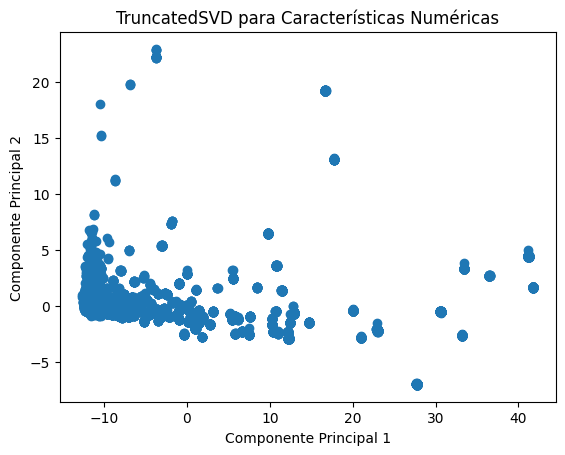

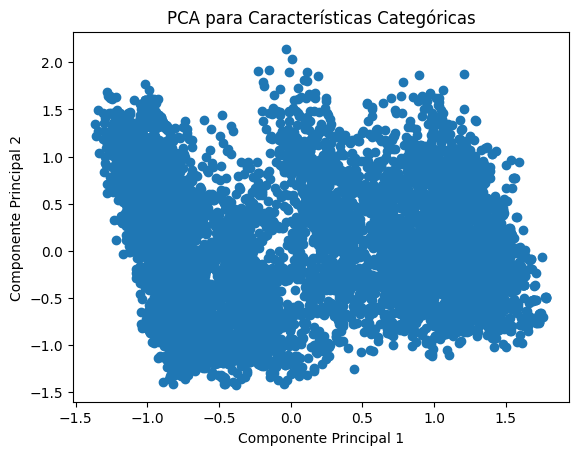

In [ ]:
# Visualizar TruncatedSVD para características numéricas
plt.scatter(svd_numeric_result[:, 0], svd_numeric_result[:, 1])
plt.title("TruncatedSVD para Características Numéricas")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()

# Visualizar PCA para características categóricas
plt.scatter(pca_categorical_result[:, 0], pca_categorical_result[:, 1])
plt.title("PCA para Características Categóricas")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()

In [ ]:
print(data.shape)
data.head()

(9227, 330)


,anio_nacim,anio_ocur,area_ur,asist_medi,capitulo,causa_def,complicaro,cond_act,cond_cert,derechohab,...,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,TAMLOC
0,1945,2021,1,2,5,F102,8,2,3,1,...,1285,518,773,142,98,62,93,744,23,6
1,1938,2020,1,1,5,F329,8,2,3,7,...,1285,518,773,142,98,62,93,744,23,6
2,1977,2021,1,2,5,F102,8,1,3,7,...,232793,169675,123670,77719,53589,2995,5984,63661,595,13
3,1933,2021,1,1,5,F03X,8,2,1,2,...,232793,169675,123670,77719,53589,2995,5984,63661,595,13
4,1964,2020,1,1,5,F102,8,1,3,1,...,232793,169675,123670,77719,53589,2995,5984,63661,595,13


#### Define

In [ ]:

# Preprocessing pipeline
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median', add_indicator=True)),
    ('encoding', QuantileTransformer(output_distribution='normal')),
    # ('encoding', StandardScaler())

])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='None', add_indicator=True)),
    ('encoding', OneHotEncoder(max_categories=50))
    # ('encoding', OneHotEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ])

preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(add_indicator=True,
                                                                strategy='median')),
                                                 ('encoding',
                                                  QuantileTransformer(output_distribution='normal'))]),
                                 Index(['ALTITUD', 'GRAPROES', 'GRAPROES_F', 'GRAPROES_M', 'HOGJEF_F',
       'HOGJEF_M', 'OCUPVIVPAR', 'P12A14NOA', 'P12A14NOAF', 'P12A14NOAM',
       ...
       'cond_act', 'cond_cert', 'derechohab',...
                                                  OneHotEncoder(max_categories=50))]),
                                 ['area_ur', 'edad', 'NOM_ENT', 'NOM_MUN',
                                  'NOM_LOC', 'ocupacion', 'ocurr_trab',
                                  'par_agre', 'razon_m', 'rel_emba', 'sexo',
                                  'sitio_ocur', 'tloc_ocurr', 'tloc_resid',
                                  'vio_fami', 'loc_resid', 'lugar_ocur',
                                  'maternas', 'mun_ocurr', 'mun_resid',
                                  'nacionalid', 'necropsia', 'escolarida',
                                  'gr_lismex', 'grupo', 'ent_ocules',
                                  'ent_ocurr', 'ent_resid', 'edo_civil',
                                  'embarazo', ...])])

#### Use

In [ ]:
#cadena_buscada = '22°09\'00.779" N'
#filas_con_cadena = data[data.applymap(lambda x: cadena_buscada in str(x)).any(axis=1)]
#print(filas_con_cadena)


In [ ]:
#column_with_value = data.columns[data.apply(lambda x: "22°09\'00.779\" N" in str(x)).any()]
#print(column_with_value)

In [ ]:
#preprocessed_features = preprocessor.fit_transform(data)

In [ ]:
data.head()

,anio_nacim,anio_ocur,area_ur,asist_medi,capitulo,causa_def,complicaro,cond_act,cond_cert,derechohab,...,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,TAMLOC
0,1945,2021,1,2,5,F102,8,2,3,1,...,1285,518,773,142,98,62,93,744,23,6
1,1938,2020,1,1,5,F329,8,2,3,7,...,1285,518,773,142,98,62,93,744,23,6
2,1977,2021,1,2,5,F102,8,1,3,7,...,232793,169675,123670,77719,53589,2995,5984,63661,595,13
3,1933,2021,1,1,5,F03X,8,2,1,2,...,232793,169675,123670,77719,53589,2995,5984,63661,595,13
4,1964,2020,1,1,5,F102,8,1,3,1,...,232793,169675,123670,77719,53589,2995,5984,63661,595,13


In [ ]:
data.causa_def.head()

0    F102
1    F329
2    F102
3    F03X
4    F102
Name: causa_def, dtype: object

In [ ]:
data.causa_def.value_counts()

F102    4418
F03X    2489
F192     409
F322     351
F209     246
        ... 
F149       1
F206       1
F051       1
F063       1
F481       1
Name: causa_def, Length: 81, dtype: int64

In [ ]:
def buscar_tipo_trastorno(data, codigo):
    codigo = codigo.upper()
    descripcion_trastornos = {
        'F019': 'Demencia vascular, no especificada',
        'F03X': 'Demencia, no especificada',
        'F051': 'Delirio superpuesto a un cuadro de demencia',
        'F058': 'Otros delirios',
        'F059': 'Delirio, no especificado',
        'F063': 'Trastornos del humor [afectivos], orgánicos',
        'F065': 'Trastorno disociativo, orgánico',
        'F067': 'Trastorno cognoscitivo leve',
        'F068': 'Otros trastornos mentales especificados debidos a lesión y disfunción cerebral y a enfermedad física',
        'F069': 'Trastorno mental no especificado debido a lesión y disfunción cerebral y a enfermedad física',
        'F072': 'Síndrome postconcusional',
        'F101': 'Trastornos mentales y del comportamiento debidos al uso de alcohol, uso nocivo',
        'F102': 'Trastornos mentales y del comportamiento debidos al uso de alcohol, síndrome de dependencia',
        'F103': 'Trastornos mentales y del comportamiento debidos al uso de alcohol, estado de abstinencia',
        'F104': 'Trastornos mentales y del comportamiento debidos al uso de alcohol, estado de abstinencia con delirio',
        'F106': 'Trastornos mentales y del comportamiento debidos al uso de alcohol, síndrome amnésico',
        'F107': 'Trastornos mentales y del comportamiento debidos al uso de alcohol, trastorno psicótico residual y de comienzo tardío',
        'F109': 'Trastornos mentales y del comportamiento debidos al uso de alcohol, trastorno mental y del comportamiento, no especificado',
        'F112': 'Trastornos mentales y del comportamiento debidos al uso de opiáceos, síndrome de dependencia',
        'F113': 'Trastornos mentales y del comportamiento debidos al uso de opiáceos, estado de abstinencia',
        'F122': 'Trastornos mentales y del comportamiento debidos al uso de cannabinoides, síndrome de dependencia',
        'F141': 'Trastornos mentales y del comportamiento debidos al uso de cocaína, uso nocivo',
        'F142': 'Trastornos mentales y del comportamiento debidos al uso de cocaína, síndrome de dependencia',
        'F149': 'Trastornos mentales y del comportamiento debidos al uso de cocaína, trastorno mental y del comportamiento, no especificado',
        'F151': 'Trastornos mentales y del comportamiento debidos al uso de otros estimulantes, incluida la cafeína, uso nocivo',
        'F152': 'Trastornos mentales y del comportamiento debidos al uso de otros estimulantes, incluida la cafeína, síndrome de dependencia',
        'F153': 'Trastornos mentales y del comportamiento debidos al uso de otros estimulantes, incluida la cafeína, estado de abstinencia',
        'F155': 'Trastornos mentales y del comportamiento debidos al uso de otros estimulantes, incluida la cafeína, trastorno psicótico',
        'F159': 'Trastornos mentales y del comportamiento debidos al uso de otros estimulantes, incluida la cafeína, trastorno mental y del comportamiento, no especificado',
        'F172': 'Trastornos mentales y del comportamiento debidos al uso de tabaco, síndrome de dependencia',
        'F179': 'Trastornos mentales y del comportamiento debidos al uso de tabaco, trastorno mental y del comportamiento, no especificado',
        'F181': 'Trastornos mentales y del comportamiento debidos al uso de disolventes volátiles, uso nocivo',
        'F182': 'Trastornos mentales y del comportamiento debidos al uso de disolventes volátiles, síndrome de dependencia',
        'F191': 'Trastornos mentales y del comportamiento debidos al uso de múltiples drogas y al uso de otras sustancias psicoactivas, uso nocivo',
        'F192': 'Trastornos mentales y del comportamiento debidos al uso de múltiples drogas y al uso de otras sustancias psicoactivas, síndrome de dependencia',
        'F193': 'Trastornos mentales y del comportamiento debidos al uso de múltiples drogas y al uso de otras sustancias psicoactivas, estado de abstinencia',
        'F194': 'Trastornos mentales y del comportamiento debidos al uso de múltiples drogas y al uso de otras sustancias psicoactivas, estado de abstinencia con delirio',
        'F197': 'Trastornos mentales y del comportamiento debidos al uso de múltiples drogas y al uso de otras sustancias psicoactivas, trastorno psicótico residual y de comienzo tardío',
        'F199': 'Trastornos mentales y del comportamiento debidos al uso de múltiples drogas y al uso de otras sustancias psicoactivas, trastorno mental y del comportamiento, no especificado',
        'F200': 'Esquizofrenia paranoide',
        'F201': 'Esquizofrenia hebefrénica',
        'F202': 'Esquizofrenia catatónica',
        'F203': 'Esquizofrenia indiferenciada',
        'F204': 'Depresión postesquizofrénica',
        'F205': 'Esquizofrenia residual',
        'F206': 'Esquizofrenia simple',
        'F208': 'Otras esquizofrenias',
        'F209': 'Esquizofrenia, no especificada',
        'F220': 'Trastorno delirante',
        'F259': 'Trastorno esquizoafectivo, no especificado',
        'F29X': 'Psicosis de origen no orgánico, no especificada',
        'F319': 'Trastorno afectivo bipolar, no especificado',
        'F322': 'Episodio depresivo grave sin síntomas psicóticos',
        'F323': 'Episodio depresivo grave con síntomas psicóticos',
        'F329': 'Episodio depresivo, no especificado',
        'F332': 'Trastorno depresivo recurrente, episodio depresivo grave presente sin síntomas psicóticos',
        'F339': 'Trastorno depresivo recurrente, no especificado',
        'F341': 'Distimia',
        'F410': 'Trastorno de pánico [ansiedad paroxística episódica]',
        'F412': 'Trastorno mixto de ansiedad y depresión',
        'F419': 'Trastorno de ansiedad, no especificado',
        'F431': 'Trastorno de estrés postraumático',
        'F439': 'Reacción al estrés grave, no especificada',
        'F444': 'Trastornos disociativos del movimiento',
        'F445': 'Convulsiones disociativas',
        'F448': 'Otros trastornos disociativos [de conversión]',
        'F481': 'Síndrome de despersonalización y desvinculación de la realidad',
        'F489': 'Trastorno neurótico, no especificado'
    }

    return descripcion_trastornos.get(codigo, 'Código de trastorno no encontrado')

In [ ]:
filtro = data["causa_def"].value_counts()
filas_interesantes = filtro[filtro <= 8]
print(filas_interesantes)


F122    8
F199    8
F202    7
F29X    7
F489    6
F502    6
F444    6
F341    5
F719    5
F332    5
F106    5
F339    4
F445    4
F068    3
F203    3
F410    3
F181    3
F141    3
F842    3
F204    3
F220    3
F509    3
F208    2
F113    2
F197    2
F072    2
F179    2
F841    2
F194    2
F153    2
F109    2
F067    2
F259    2
F151    2
F159    2
F155    1
F728    1
F431    1
F065    1
F201    1
F99X    1
F649    1
F149    1
F206    1
F051    1
F063    1
F481    1
Name: causa_def, dtype: int64


In [ ]:
# data.drop(['causa_def'], axis=1)
data[data.columns.difference(['causa_def'])].shape

(9227, 329)

In [ ]:
preprocessed_features = preprocessor.fit_transform(data[data.columns.difference(['causa_def'])])

In [ ]:
preprocessed_data = pd.DataFrame(preprocessed_features, index=data.index)

preprocessed_data.head()

,0,1,2,3,4,5,6,7,8,9,...,1131,1132,1133,1134,1135,1136,1137,1138,1139,1140
0,0.598114,-0.036391,0.231641,-0.166367,-0.658666,-0.661162,-0.651038,-0.548158,-0.480839,-0.644086,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.598114,-0.036391,0.231641,-0.166367,-0.658666,-0.661162,-0.651038,-0.548158,-0.480839,-0.644086,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.425228,0.768075,0.746351,0.654930,0.708752,0.788455,0.873515,1.046576,0.905189,1.095556,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.425228,0.768075,0.746351,0.654930,0.708752,0.788455,0.873515,1.046576,0.905189,1.095556,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.425228,0.768075,0.746351,0.654930,0.708752,0.788455,0.873515,1.046576,0.905189,1.095556,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
preprocessed_data.shape

(9227, 1141)

In [ ]:
preprocessed_data = pd.concat([preprocessed_data, data[['causa_def']]], axis=1)

In [ ]:
defunciones_problematicas = preprocessed_data['causa_def'].value_counts()[preprocessed_data['causa_def'].value_counts() < 70].index.tolist()
defunciones_problematicas.extend(preprocessed_data['causa_def'].value_counts()[preprocessed_data['causa_def'].value_counts() > 1000].index.tolist())
print(defunciones_problematicas)
# Agregar las defunciones con menos de 6 muestras al arreglo non_defunciones
non_defunciones = defunciones_problematicas
print(non_defunciones)
# Agregar 'F102' y 'F03X' al arreglo non_defunciones
#non_defunciones.extend(['F102', 'F03X'])
#non_defunciones = ['F155', 'F728', 'F431', 'F065', 'F201', 'F99X', 'F649', 'F149', 'F206', 'F051', 'F063', 'F481','F410', 'F419','F059','F319','F102','F03X']
#F059 con 84
#F412 con 48
#F102 más alta
#F03x 2da más alta

['F193', 'F412', 'F112', 'F200', 'F152', 'F069', 'F182', 'F799', 'F104', 'F191', 'F419', 'F319', 'F323', 'F448', 'F82X', 'F101', 'F840', 'F058', 'F500', 'F439', 'F142', 'F107', 'F205', 'F729', 'F122', 'F199', 'F202', 'F29X', 'F489', 'F502', 'F444', 'F341', 'F719', 'F332', 'F106', 'F339', 'F445', 'F068', 'F203', 'F410', 'F181', 'F141', 'F842', 'F204', 'F220', 'F509', 'F208', 'F113', 'F197', 'F072', 'F179', 'F841', 'F194', 'F153', 'F109', 'F067', 'F259', 'F151', 'F159', 'F155', 'F728', 'F431', 'F065', 'F201', 'F99X', 'F649', 'F149', 'F206', 'F051', 'F063', 'F481', 'F102', 'F03X']
['F193', 'F412', 'F112', 'F200', 'F152', 'F069', 'F182', 'F799', 'F104', 'F191', 'F419', 'F319', 'F323', 'F448', 'F82X', 'F101', 'F840', 'F058', 'F500', 'F439', 'F142', 'F107', 'F205', 'F729', 'F122', 'F199', 'F202', 'F29X', 'F489', 'F502', 'F444', 'F341', 'F719', 'F332', 'F106', 'F339', 'F445', 'F068', 'F203', 'F410', 'F181', 'F141', 'F842', 'F204', 'F220', 'F509', 'F208', 'F113', 'F197', 'F072', 'F179', 'F841'

In [ ]:
#pd.set_option('display.max_rows', None)
preprocessed_data.causa_def.value_counts()

F102    4418
F03X    2489
F192     409
F322     351
F209     246
        ... 
F149       1
F206       1
F051       1
F063       1
F481       1
Name: causa_def, Length: 81, dtype: int64

In [ ]:
#Es basicamente para saber cuantos registros hay con los datos que indicaste en el arreglo non_defunciones
preprocessed_data[preprocessed_data.causa_def.isin(non_defunciones)].shape

(7619, 1142)

In [ ]:
preprocessed_data = preprocessed_data[~preprocessed_data.causa_def.isin(non_defunciones)]
print('non defunciones: ',non_defunciones)
print('preprocessed_data: \n',preprocessed_data.causa_def)
preprocessed_data.shape

non defunciones:  ['F193', 'F412', 'F112', 'F200', 'F152', 'F069', 'F182', 'F799', 'F104', 'F191', 'F419', 'F319', 'F323', 'F448', 'F82X', 'F101', 'F840', 'F058', 'F500', 'F439', 'F142', 'F107', 'F205', 'F729', 'F122', 'F199', 'F202', 'F29X', 'F489', 'F502', 'F444', 'F341', 'F719', 'F332', 'F106', 'F339', 'F445', 'F068', 'F203', 'F410', 'F181', 'F141', 'F842', 'F204', 'F220', 'F509', 'F208', 'F113', 'F197', 'F072', 'F179', 'F841', 'F194', 'F153', 'F109', 'F067', 'F259', 'F151', 'F159', 'F155', 'F728', 'F431', 'F065', 'F201', 'F99X', 'F649', 'F149', 'F206', 'F051', 'F063', 'F481', 'F102', 'F03X']
preprocessed_data: 
 1       F329
5       F059
12      F192
13      F329
23      F329
        ... 
9180    F322
9194    F329
9205    F172
9223    F322
9226    F322
Name: causa_def, Length: 1608, dtype: object


(1608, 1142)

In [ ]:
#después de haber quitado clases
preprocessed_data.causa_def.value_counts()

F192    409
F322    351
F209    246
F329    219
F103    146
F059     93
F83X     73
F172     71
Name: causa_def, dtype: int64

## Modeling

In [ ]:
preprocessed_data.shape

(1608, 1142)

In [ ]:
preprocessed_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1608 entries, 1 to 9226
Columns: 1142 entries, 0 to causa_def
dtypes: float64(1141), object(1)
memory usage: 14.0+ MB


In [ ]:
#targets = ['causa_def']
#targets

In [ ]:
#target_values = preprocessed_data[targets] # define y
#features_values = preprocessed_data[preprocessed_data.columns.difference(['causa_def'])]  # define X

#target_values.shape, features_values.shape

In [ ]:
preprocessed_data.columns.difference(['causa_def'])

Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       1131, 1132, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140],
      dtype='object', length=1141)

In [ ]:
X = preprocessed_data[preprocessed_data.columns.difference(['causa_def'])]
y = preprocessed_data['causa_def']
X.shape, y.shape

((1608, 1141), (1608,))

In [ ]:
from sklearn.model_selection import train_test_split



```
Trainning  P(X_train, y_train) -> 90%
Validation P(X_val, y_val)     -> 10%
```



In [ ]:
#X_train, X_val, y_train, y_val = train_test_split(features_values,
 #                                                 target_values,
  #                                                stratify=target_values,
   #                                               train_size=0.9)

#(X_train.shape, y_train.shape), (X_val.shape, y_val.shape)

In [ ]:
# Primera partición: 80% train, 10% test1
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.20, random_state=42)

# Segunda partición: 10% test1, 10% test2
X_test1, X_test2, y_test1, y_test2 = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

# Verificar las dimensiones de los conjuntos
print("Conjunto de entrenamiento (train):", X_train.shape, y_train.shape)
print("Conjunto de prueba 1 (test1):", X_test1.shape, y_test1.shape)
print("Conjunto de prueba 2 (test2):", X_test2.shape, y_test2.shape)


Conjunto de entrenamiento (train): (1286, 1141) (1286,)
Conjunto de prueba 1 (test1): (161, 1141) (161,)
Conjunto de prueba 2 (test2): (161, 1141) (161,)


## sobresampleo

In [ ]:
# Calcular el número de muestras de la clase más grande después de aplicar SMOTE
max_samples = y_train.value_counts().max()

# Calcular el valor del parámetro sampling_strategy
oversampling_strategy = {cls: max_samples for cls in y_train.unique()}

print(max_samples)
print("Valor del parámetro oversampling_strategy:", oversampling_strategy)


323
Valor del parámetro oversampling_strategy: {'F059': 323, 'F192': 323, 'F322': 323, 'F209': 323, 'F83X': 323, 'F103': 323, 'F172': 323, 'F329': 323}


In [ ]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE


In [ ]:
smote = SMOTE(sampling_strategy=oversampling_strategy, random_state=42)
# Convertir X_train a un arreglo NumPy (matriz densa)

# Aplicar SMOTE solo en el conjunto de entrenamiento
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Check the dimensions of the new balanced dataset
print(X_resampled.shape, y_resampled.shape)


(2584, 1141) (2584,)


In [ ]:
from pycaret.classification import *

In [ ]:
y.value_counts()


F192    409
F322    351
F209    246
F329    219
F103    146
F059     93
F83X     73
F172     71
Name: causa_def, dtype: int64

In [ ]:
y_resampled.value_counts()

F059    323
F192    323
F322    323
F209    323
F83X    323
F103    323
F172    323
F329    323
Name: causa_def, dtype: int64

In [ ]:
'''from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Crear una instancia del RandomForestClassifier con el parámetro class_weight
# El parámetro 'balanced' ajustará automáticamente los pesos inversamente proporcional a las frecuencias de clase
# También puedes pasar un diccionario que asigna pesos personalizados a las clases
rf_classifier = RandomForestClassifier(class_weight='balanced', random_state=42)

# Entrenar el modelo con el conjunto de entrenamiento balanceado
rf_classifier.fit(X_train, y_train)'''

"from sklearn.ensemble import RandomForestClassifier\nfrom sklearn.metrics import classification_report\n\n# Crear una instancia del RandomForestClassifier con el parámetro class_weight\n# El parámetro 'balanced' ajustará automáticamente los pesos inversamente proporcional a las frecuencias de clase\n# También puedes pasar un diccionario que asigna pesos personalizados a las clases\nrf_classifier = RandomForestClassifier(class_weight='balanced', random_state=42)\n\n# Entrenar el modelo con el conjunto de entrenamiento balanceado\nrf_classifier.fit(X_train, y_train)"

In [ ]:
'''# Realizar predicciones en el conjunto de prueba 1
y_pred_test1 = rf_classifier.predict(X_test1)

# Evaluación del modelo en el conjunto de prueba 1
print("Conjunto de prueba 1:")
print(classification_report(y_test1, y_pred_test1))

# Realizar predicciones en el conjunto de prueba 2
y_pred_test2 = rf_classifier.predict(X_test2)

# Evaluación del modelo en el conjunto de prueba 2
print("Conjunto de prueba 2:")
print(classification_report(y_test2, y_pred_test2))'''

'# Realizar predicciones en el conjunto de prueba 1\ny_pred_test1 = rf_classifier.predict(X_test1)\n\n# Evaluación del modelo en el conjunto de prueba 1\nprint("Conjunto de prueba 1:")\nprint(classification_report(y_test1, y_pred_test1))\n\n# Realizar predicciones en el conjunto de prueba 2\ny_pred_test2 = rf_classifier.predict(X_test2)\n\n# Evaluación del modelo en el conjunto de prueba 2\nprint("Conjunto de prueba 2:")\nprint(classification_report(y_test2, y_pred_test2))'

In [ ]:
#temp = pd.concat([X_train, y_train], axis=1)
#temp.head(1)

In [ ]:
#temp.causa_def.value_counts()

In [ ]:
train_data = pd.concat([X_resampled, y_resampled], axis=1)
print(train_data.shape)
train_data.head()

(2584, 1142)


,0,1,2,3,4,5,6,7,8,9,...,1132,1133,1134,1135,1136,1137,1138,1139,1140,causa_def
0,-1.811457,-0.826698,-0.953493,-0.724973,-0.530814,-0.536238,-0.522388,-0.562796,-0.601439,-0.537980,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,F059
1,0.156199,-0.296607,-0.283522,-0.312376,0.332198,0.361511,0.426601,0.828465,0.805692,0.828465,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,F192
2,0.031918,-1.225943,-1.199766,-1.225943,-0.587642,-0.565674,-0.600901,-0.384375,-0.318969,-0.444534,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,F322
3,1.137677,0.025094,0.022584,0.110627,0.109728,0.157469,0.157469,0.177827,0.165310,0.165622,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,F209
4,0.019314,-0.683474,-0.807429,-0.570161,-0.506348,-0.438907,-0.458425,-0.374936,-0.490721,-0.316330,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,F209


In [ ]:
#hacer dos particiones para test1
test_data = pd.concat([X_test1, y_test1], axis=1)
print(test_data.shape)
test_data.head()

(161, 1142)


,0,1,2,3,4,5,6,7,8,9,...,1132,1133,1134,1135,1136,1137,1138,1139,1140,causa_def
3470,0.570161,0.350817,0.348150,0.337506,-0.195750,-0.222057,-0.231641,-0.362850,-0.369558,-0.358833,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,F322
3547,0.156199,-0.296607,-0.283522,-0.312376,0.332198,0.361511,0.426601,0.828465,0.805692,0.828465,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,F192
7589,1.602272,-2.831057,-2.658282,-2.949615,-1.036742,-1.123176,-1.044409,-0.926176,-0.989697,-0.890172,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,F209
5245,-0.476619,1.327982,1.629992,0.995858,0.388430,0.316330,0.316330,0.297918,0.222630,0.332198,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,F322
6059,-0.280911,-0.731515,-0.715218,-0.781626,-0.777569,-0.808984,-0.808363,-0.897655,-1.442543,-0.743040,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,F192


In [ ]:
#hacer dos particiones para test2
test_data2 = pd.concat([X_test2, y_test2], axis=1)
print(test_data2.shape)
test_data2.head()

(161, 1142)


,0,1,2,3,4,5,6,7,8,9,...,1132,1133,1134,1135,1136,1137,1138,1139,1140,causa_def
1516,-0.362850,0.067799,0.094232,0.067799,1.365257,1.654145,1.479004,1.750222,1.750222,1.750222,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,F103
2936,0.949547,0.067799,0.046436,0.110627,0.284828,0.290058,0.305796,0.361511,0.366873,0.421111,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,F192
4165,-0.220701,-0.427976,-0.262686,-0.582009,-0.608973,-0.634605,-0.651976,-0.926176,-1.231280,-0.812654,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,F209
7316,-0.765045,-0.526417,-0.564267,-0.480972,-0.585515,-0.628492,-0.646628,-0.726606,-0.659602,-0.812654,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,F83X
6968,-0.749039,-0.781626,-0.667419,-0.914679,-0.918498,-0.779376,-0.840388,-0.812654,-0.989697,-0.720087,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,F322


In [ ]:
print(data_encoded)

  (0, 0)	0.8336319539552968
  (0, 1)	0.25829179035585625
  (0, 2)	0.40787075352136093
  (0, 3)	0.09302723734690521
  (0, 4)	-0.7609009266809068
  (0, 5)	-0.7590688109295683
  (0, 6)	-0.7562312048927584
  (0, 7)	-0.6758108380492361
  (0, 8)	-0.6667386165857598
  (0, 9)	-0.6829369248459543
  (0, 10)	-0.7582154971191465
  (0, 11)	-0.7529229652150188
  (0, 12)	-0.7490534708217845
  (0, 13)	-0.7540244123030518
  (0, 14)	-0.7529748559214644
  (0, 15)	-0.7549725287872864
  (0, 16)	-0.7070114758622603
  (0, 17)	-0.7171063945358468
  (0, 18)	-0.6921891682993542
  (0, 19)	-0.7450267929766076
  (0, 20)	-0.7476306108121302
  (0, 21)	-0.7339501795306176
  (0, 22)	-0.7226760012861908
  (0, 23)	-0.7239487450323111
  (0, 24)	-0.7209698172121868
  :	:
  (9226, 288)	-0.2530696104299715
  (9226, 289)	-0.12432975857577123
  (9226, 290)	1.4819508829321264
  (9226, 291)	0.6306366524682117
  (9226, 320)	1.0
  (9226, 435)	1.0
  (9226, 1068)	1.0
  (9226, 3173)	1.0
  (9226, 4667)	1.0
  (9226, 4672)	1.0
  (9226,

In [ ]:
import pandas as pd
from pycaret.classification import *

# Inicializar la configuración del entorno PyCaret
clf = setup(data=train_data,
            target="causa_def",
            session_id=42)

clf

,Description,Value
0,Session id,42
1,Target,causa_def
2,Target type,Multiclass
3,Target mapping,"F059: 0, F103: 1, F172: 2, F192: 3, F209: 4, F322: 5, F329: 6, F83X: 7"
4,Original data shape,"(2584, 1142)"
5,Transformed data shape,"(2584, 1142)"
6,Transformed train set shape,"(1808, 1142)"
7,Transformed test set shape,"(776, 1142)"
8,Numeric features,1141
9,Preprocess,True


In [ ]:
# Comparar y evaluar varios modelos:
best_model = compare_models(fold=4)
best_model

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9121,0.9921,0.9121,0.9151,0.9114,0.8995,0.9002,20.6250
et,Extra Trees Classifier,0.9115,0.9914,0.9115,0.9127,0.9109,0.8989,0.8992,1.5825
xgboost,Extreme Gradient Boosting,0.9087,0.9919,0.9087,0.9121,0.9081,0.8957,0.8964,34.6800
gbc,Gradient Boosting Classifier,0.9060,0.9920,0.9060,0.9078,0.9054,0.8925,0.8930,75.6825
lr,Logistic Regression,0.8949,0.9860,0.8949,0.8987,0.8933,0.8799,0.8811,12.8900
rf,Random Forest Classifier,0.8916,0.9889,0.8916,0.8924,0.8904,0.8761,0.8766,2.2575
ridge,Ridge Classifier,0.8899,0.0000,0.8899,0.8922,0.8882,0.8742,0.8752,0.3425
dt,Decision Tree Classifier,0.8634,0.9219,0.8634,0.8646,0.8627,0.8439,0.8443,0.5575
nb,Naive Bayes,0.8523,0.9383,0.8523,0.8659,0.8428,0.8312,0.8367,0.3300
lda,Linear Discriminant Analysis,0.7378,0.8625,0.7378,0.7278,0.7238,0.7004,0.7029,1.6925


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
def contar_registros_por_codigo(data, codigo):
    conteo = data[data['causa_def'] == codigo].shape[0]
    return conteo
# Ciclo para ingresar múltiples códigos
while True:
    codigo = input("Ingrese el código del trastorno (o 'q' para salir): ").upper()
    tipo_trastorno = buscar_tipo_trastorno(data, codigo)
    if codigo == 'Q':
        break

    conteo = contar_registros_por_codigo(test_data, codigo)
    print(tipo_trastorno,"\n Número de registros para el código", codigo, ":", conteo)


Ingrese el código del trastorno (o 'q' para salir): q


## verificar columnas con datos idénticos antes del setup




In [ ]:
#filtro = data["presunto"].value_counts()
#filas_interesantes = filtro[filtro <= 8]
#print(filtro)

In [ ]:
#ml_exp_01 = setup(
 #   data=temp,
  #  target='causa_def',
   # session_id=42, #equivalente a random_state
    #train_size=0.9
#)

In [ ]:
#best_model = compare_models(fold=2)

In [ ]:
#tAmp = pd.concat([X_val, y_val], axis=1)
#tAmp.head(1)

In [ ]:
#TSNE
#best_model.predict(tAmp)
#OPTUNA

In [ ]:
#evaluate_model(best_model)

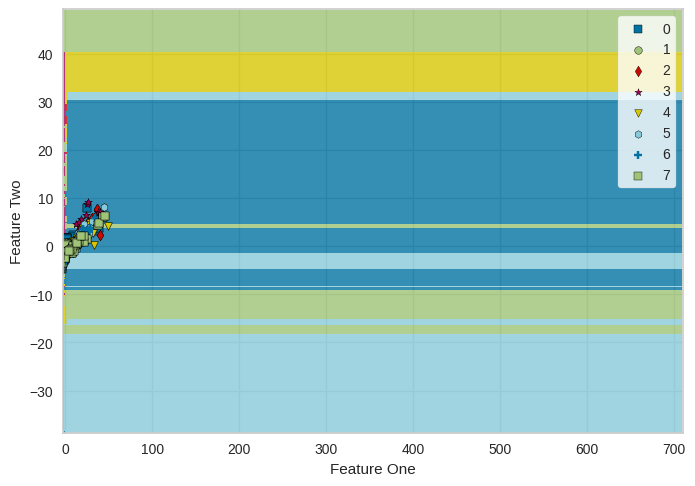

In [ ]:
# Plotear el gráfico de límites de decisión
plot_model(best_model, plot="boundary")

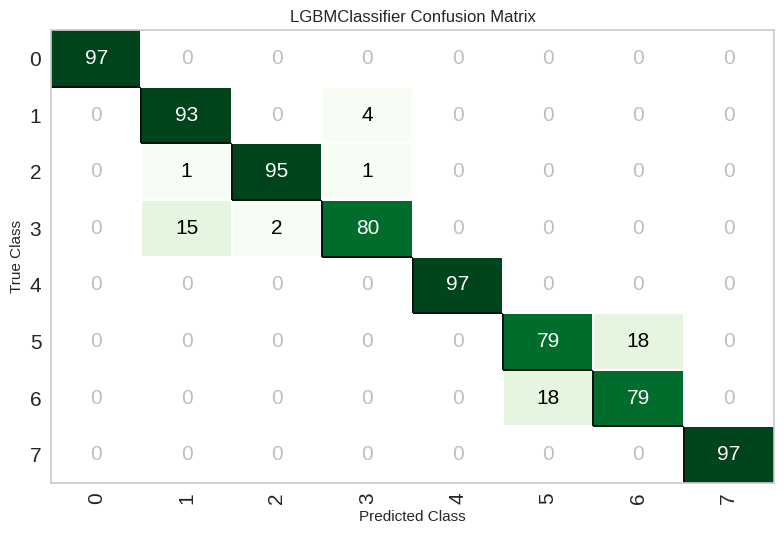

In [ ]:
# Plotear la matriz de confusión
plot_model(best_model, plot="confusion_matrix")

In [ ]:
# Entrenar el mejor modelo y realizar predicciones:
final_model = finalize_model(best_model)
final_model

Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['0', '1', '2', '3', '4', '5', '6',
                                             '7', '8', '9', '10', '11', '12',
                                             '13', '14', '15', '16', '17', '18',
                                             '19', '20', '21', '22', '23', '24',
                                             '25', '26', '27'...
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=100, n_jobs=-1,
                                num_leaves=31, objective=None, random_state=42,
                                reg_alpha=0.0, reg_lambda=0.0, silent='warn',
                                subsample=1.0, subsample_for_bin=200000,
                                subsample_freq=0))],
         verbose=False)

In [ ]:
#model_path
from pycaret.classification import save_model

# Suponiendo que ya tienes el modelo final entrenado y almacenado en la variable final_model
# Guardar el modelo en un archivo
#save_model(final_model, model_path)


In [ ]:
predictions = predict_model(final_model, data=test_data)

# predictions

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8261,0.9789,0.8261,0.8269,0.8162,0.7897,0.7925


In [ ]:
predictions = predict_model(final_model, data=test_data2)

# predictions

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8634,0.9790,0.8634,0.8831,0.8682,0.8356,0.8379


In [ ]:
predictions = predict_model(final_model, data=train_data)

# predictions

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [ ]:
print(len(test_data['causa_def']))
print(len(predictions))


161
2584


In [ ]:
print(len(test_data2['causa_def']))
print(len(predictions))

161
2584


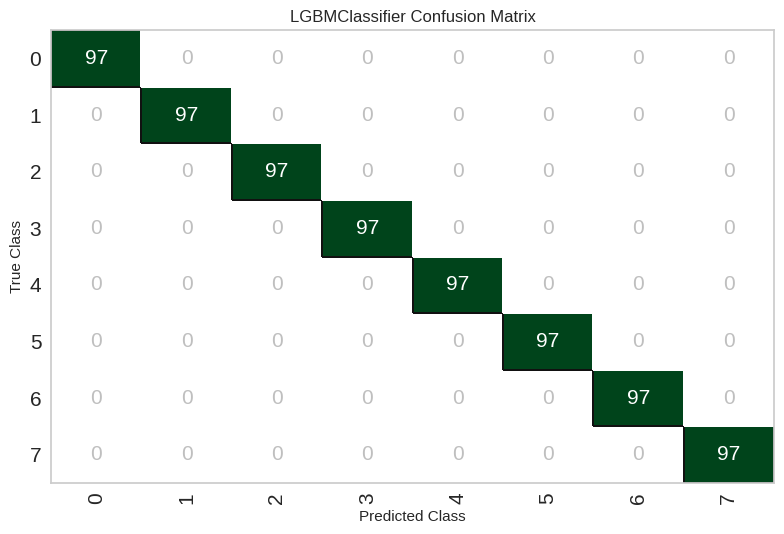

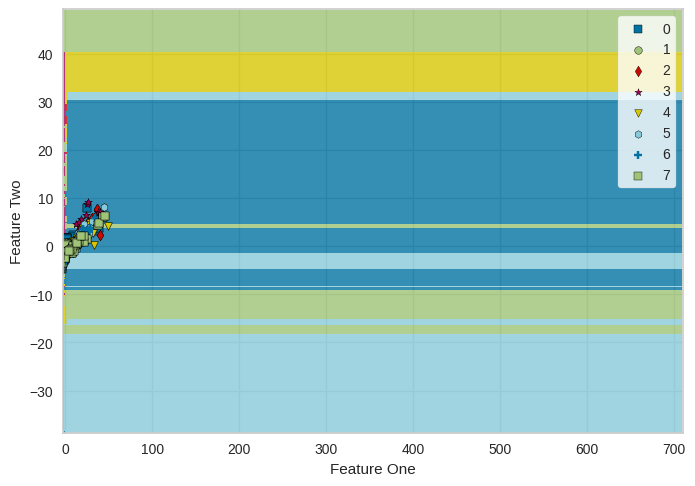

In [ ]:
# Plotear la matriz de confusión
plot_model(final_model, plot="confusion_matrix")
# Plotear el gráfico de límites de decisión
plot_model(final_model, plot="boundary")

## Verificaciones

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss

In [ ]:
from sklearn.model_selection import cross_val_score

# Supongamos que ya tienes tu modelo (por ejemplo, un clasificador llamado "modelo")
# y tus datos de entrenamiento (X_train, y_train)

# Realizar validación cruzada con 5 folds
scores = cross_val_score(final_model, X_train, y_train, cv=5)

# Calcular el promedio de las puntuaciones
mean_score = scores.mean()

# Imprimir el resultado
print("Rendimiento promedio en validación cruzada:", mean_score)


Rendimiento promedio en validación cruzada: 0.82504750701294


## Visualizar la matriz de confusión:


In [ ]:
!pip install seaborn matplotlib


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


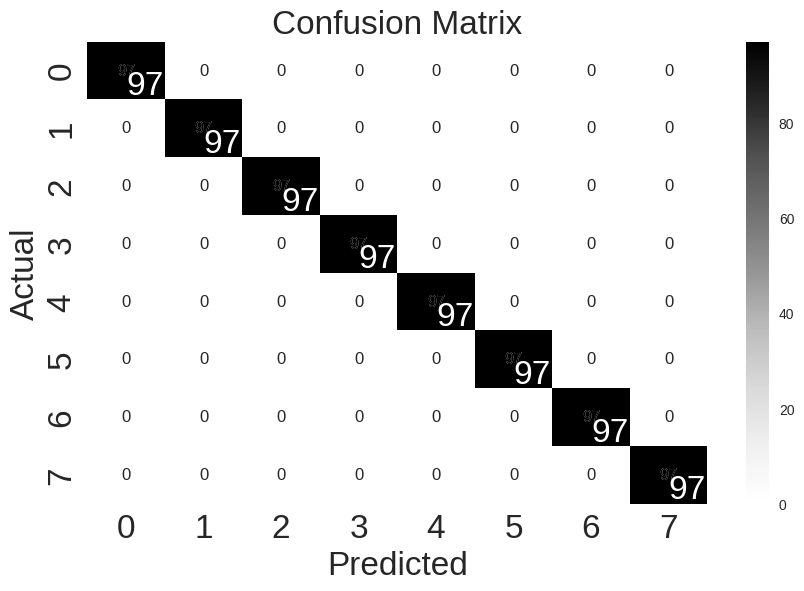

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener las predicciones del modelo final en el conjunto de prueba
predictions = predict_model(final_model)

# Obtener las clases únicas presentes en el conjunto de prueba
unique_classes = np.unique(predictions['causa_def'])

# Reemplaza 'Label' con el nombre correcto de la columna que contiene las predicciones del modelo
prediction_column = 'causa_def'  # Reemplaza esto con el nombre correcto

# Verificar si la columna de predicciones existe en el DataFrame de predicciones
if prediction_column not in predictions.columns:
    raise KeyError(f"La columna '{prediction_column}' no se encuentra en el DataFrame de predicciones.")

# Inicializar la matriz de confusión
conf_matrix = np.zeros((len(unique_classes), len(unique_classes)), dtype=int)

# Llenar la matriz de confusión con las predicciones y las clases reales
for i in range(len(predictions)):
    actual_class = predictions['causa_def'].iloc[i]
    predicted_class = predictions[prediction_column].iloc[i]
    row_idx = np.where(unique_classes == actual_class)[0][0]
    col_idx = np.where(unique_classes == predicted_class)[0][0]
    conf_matrix[row_idx, col_idx] += 1

# Crear la figura y los ejes del gráfico
plt.figure(figsize=(10, 6))
ax=sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greys", xticklabels=unique_classes, yticklabels=unique_classes)

# Añadir etiquetas y título
plt.xlabel('Predicted',fontsize=24)
plt.ylabel('Actual',fontsize=24)
plt.title('Confusion Matrix',fontsize=24)

# Cambiar tamaño de letra de las etiquetas de los ejes
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
# Cambiar tamaño de letra de los valores de la diagonal

for i in range(len(unique_classes)):
    ax.text(i + 0.5, i + 0.5, str(conf_matrix[i, i]), fontsize=12, ha='center', va='center', color='black')
    ax.text(i + 0.5, i + 0.5, str(conf_matrix[i, i]), fontsize=24, ha='left', va='top', color='white')

# Mostrar el gráfico
plt.show()


In [ ]:
train_data['causa_def'].head()

0    F059
1    F192
2    F322
3    F209
4    F209
Name: causa_def, dtype: object

## Visualizar las distribuciones de las clases:

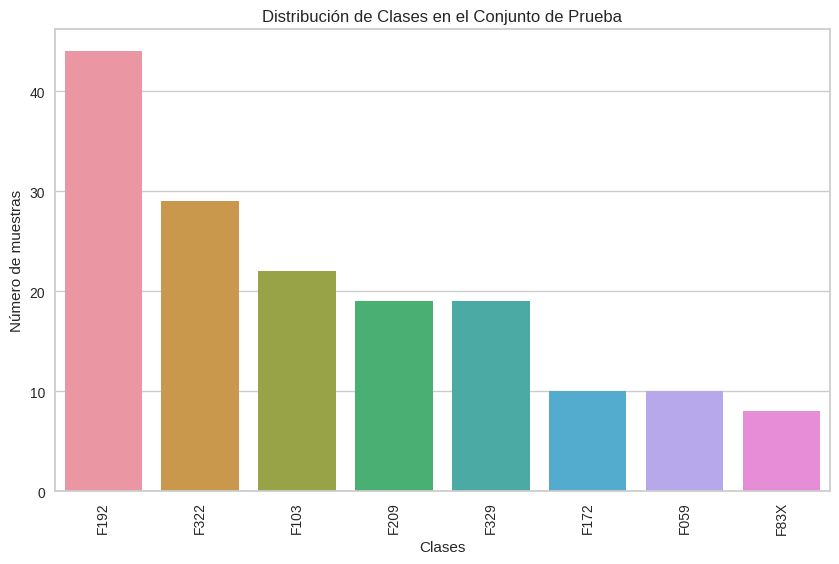

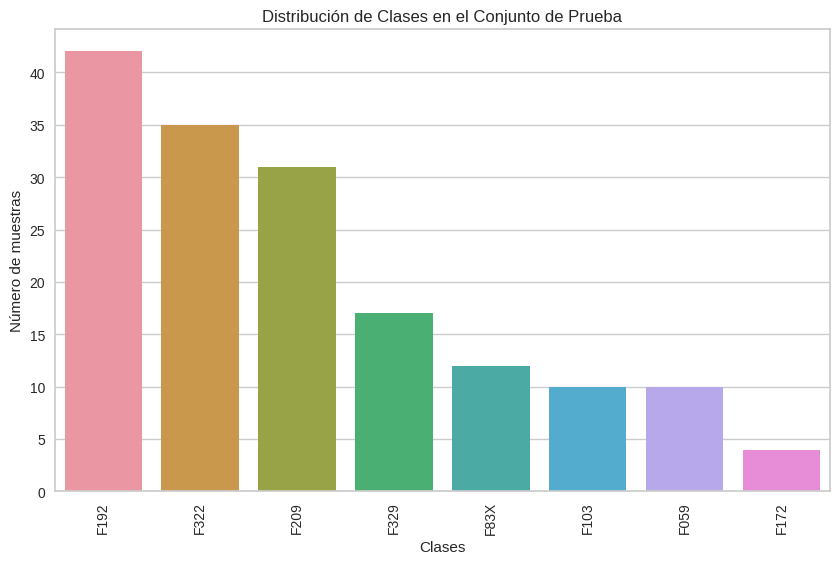

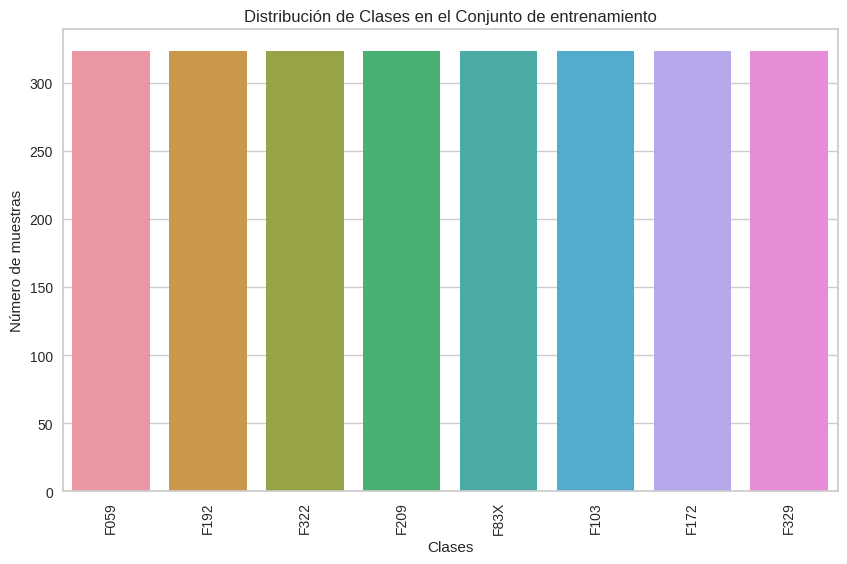

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener la distribución de clases en el conjunto de prueba
class_distribution = test_data['causa_def'].value_counts()

# Visualizar la distribución de clases en el conjunto de prueba
plt.figure(figsize=(10, 6))
sns.barplot(x=class_distribution.index, y=class_distribution.values)
plt.xlabel('Clases')
plt.ylabel('Número de muestras')
plt.title('Distribución de Clases en el Conjunto de Prueba')
plt.xticks(rotation=90)
plt.show()
# Obtener la distribución de clases en el conjunto de prueba
class_distribution = test_data2['causa_def'].value_counts()

# Visualizar la distribución de clases en el conjunto de prueba
plt.figure(figsize=(10, 6))
sns.barplot(x=class_distribution.index, y=class_distribution.values)
plt.xlabel('Clases')
plt.ylabel('Número de muestras')
plt.title('Distribución de Clases en el Conjunto de Prueba')
plt.xticks(rotation=90)
plt.show()
# Obtener la distribución de clases en el conjunto de prueba
class_distribution = train_data['causa_def'].value_counts()

# Visualizar la distribución de clases en el conjunto de prueba
plt.figure(figsize=(10, 6))
sns.barplot(x=class_distribution.index, y=class_distribution.values)
plt.xlabel('Clases')
plt.ylabel('Número de muestras')
plt.title('Distribución de Clases en el Conjunto de entrenamiento')
plt.xticks(rotation=90)
plt.show()

In [ ]:
class_distribution

F059    323
F192    323
F322    323
F209    323
F83X    323
F103    323
F172    323
F329    323
Name: causa_def, dtype: int64

In [ ]:
buscar_tipo_trastorno(test_data,'f102')

'Trastornos mentales y del comportamiento debidos al uso de alcohol, síndrome de dependencia'

In [ ]:
from pycaret.classification import load_model
from google.colab import drive
drive.mount('/content/drive')

# Cargar el modelo desde el archivo
loaded_model = load_model(model_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Transformation Pipeline and Model Successfully Loaded
